# Lib Imports

In [0]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
#loading Dataset 
hman=pd.read_csv('haberman.csv')

# High level Statistics

In [0]:
#shape of data 

print("shape of the data is :",hman.shape)

shape of the data is : (306, 4)


In [0]:
print("feature names:",hman.columns)

feature names: Index(['age', 'year', 'nodes', 'status'], dtype='object')


* This dataset contains 306 datapoints  and 4 features( 3 independent variable and 1 target variable.
    1. <b>Feature 1:: Age:(Numerical Feature)</b> Age of the patient on the day of operation 
    2. <b>Feature 2:: year:(Numerical Feature)</b> The year when the operation took place 
    3. <b>Feature 3:: Nodes:(Numerical Feature)</b> Detected number of auxiliary nodes 
    4. <b> Target :: Status:(Numerical Feature)</b> Information on patient survival within 5 years of operation
    
Reference:http://archive.ics.uci.edu/ml/datasets/haberman's+survival


In [0]:
print(hman.head(5))

   age  year  nodes  status
0   30    64      1       1
1   30    62      3       1
2   30    65      0       1
3   31    59      2       1
4   31    65      4       1


In [0]:
# number of datapoint belong to each class label
print(hman['status'].value_counts())

1    225
2     81
Name: status, dtype: int64


There are two types of class labels:
* 1 represents patient survived 5 years or longer
* 2 represents patient died within 5 years 

for convenience of operation and readability  , these labels will be converted to text value( non numerical) of what they represent.

1. 'long_lifespan'
2. 'short_lifespan'

In [0]:
#http://archive.ics.uci.edu/ml/datasets/haberman's+survival

hman['status']=hman['status'].apply(lambda x:'long_lifespan' if x==1 else 'short_lifespan')


long_lifespan     225
short_lifespan     81
Name: status, dtype: int64


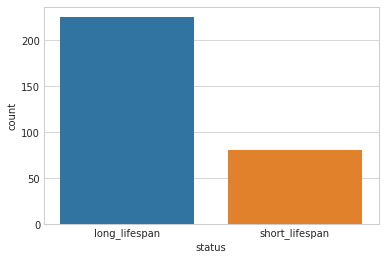

In [0]:
print(hman['status'].value_counts())
sns.countplot(data =hman, x = 'status')
plt.show()

* <b> Observations </b>
    * Haberman dataset is an imbalanced dataset where the class 'long_lifespan' has 225 datapoints and the class 'short_lifespan' has 81 datapoints

# Objective
* To predict whether the patient who had surgery for breast cancer would survive more than 5 years post surgery or not using given feature age , year of operation and nodes. 

# Bi-variate Analysis

## 2D scatter plot

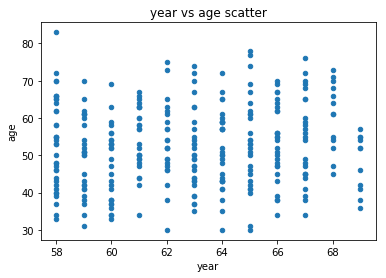

In [0]:
hman.plot(kind='scatter',x='year',y='age',title='year vs age scatter')
plt.show()

* Observation: 
    * The above plot shows the scatter plot of year vs age.This plot shows data from both class labels. It is difficult to find out which point represents which class or to infer information as  all the points have same color.
    * However, it is evident that points are overlapping. 

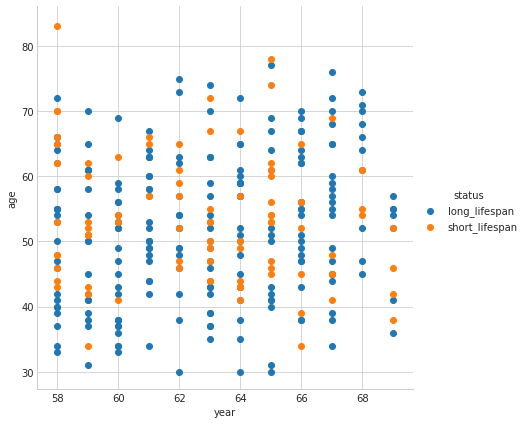

In [0]:
sns.set_style('whitegrid')
sns.FacetGrid(hman,hue='status',size=6).\
map(plt.scatter,'year','age').add_legend()
plt.show()

* <b> Observation </b> 
    * It's difficult to interpret any information from these plot as the points are overlapping. There could be  points buried under other class point. 
    * Since the datapoints are not linearly separable , it would be hard to separate them 

## Pairplot

* Since we have 3 features and 3D plots take heavy computing resource , we will do pairplots. 
* Total number of possible pairs in pairplot= 3c2=3

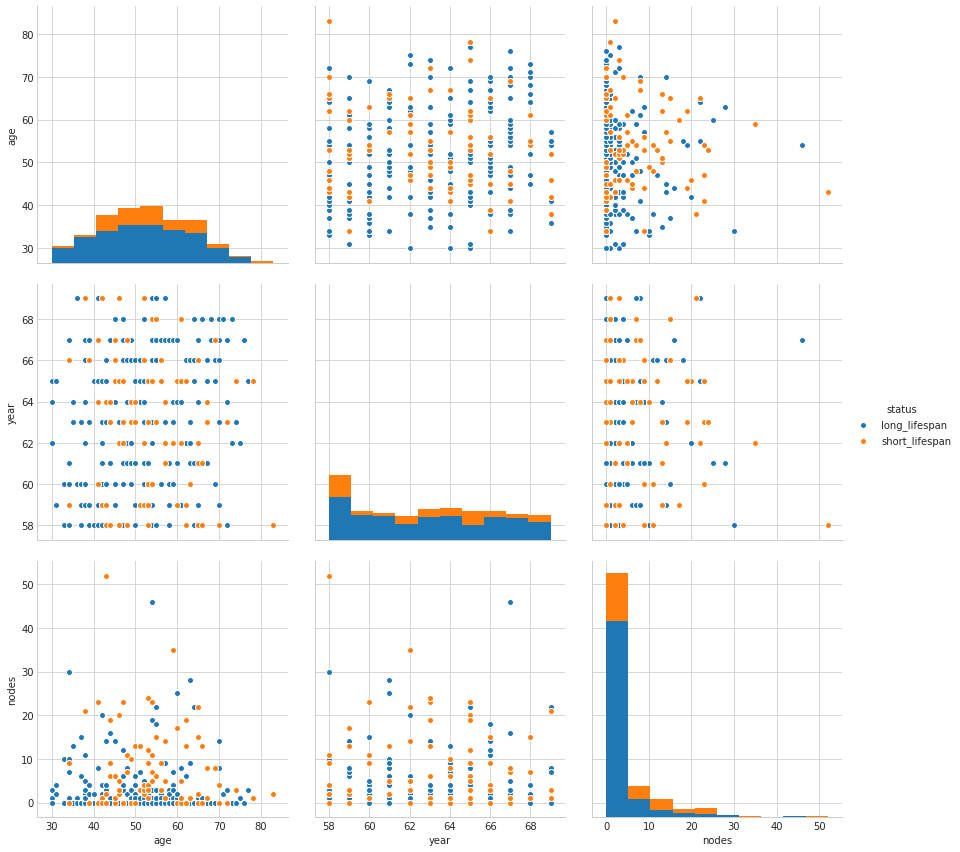

In [0]:
sns.set_style('whitegrid')
sns.pairplot(hman,hue='status',size=4)
plt.show()

* <b> Observations </b>
    * for our consideration , we are going to take plot 2( age vs year),3(age vs nodes),6(year vs nodes) as except diagonal plots which represents histogram , rest are just mirror plot of these plots. Since we would like to see the data in combination of different features as part of bivariate analysis, we are discarding histogram . 
    * <b> Plot 2 (age vs year):</b> This plot has already been observed when we did the scatter plot using seaborn. As it shows the good amount of overlapping , this combination is really not useful in terms of classification. This combination will not be considered for further analysis.
    * <b> Plot 6(year vs nodes)</b>:The datapoints of both class labels are too dense and the overlapping is more than that is in plot 2. This combination will not be considered for further analysis.
    * <b> Plot 3( age vs nodes </b>: Although , overlapping is visible in this plot as well but the amount of overlapping is comparatively low . at nodes=0, the point density is high.  A few points are well separated from others. However , we can't draw a line or use any conditional statement to separate data due to presence of overlapped points in this feature combination plot. 
    

<b> as per the observation, age vs nodes would be the best feature combination to choose 
    

# Univariate Analysis

## Histogram ,PDF , CDF

Before we actually plot the histogram , PDF and CDF , we would plot 1D scatter plot. To understand if the points are buried under other points , we will use circle marker and triangle marker to denote the points.

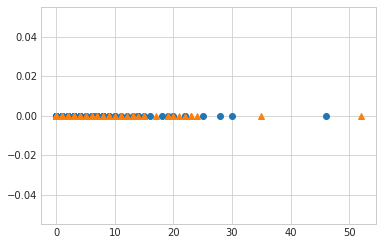

In [0]:
hman_long=hman[hman['status']=='long_lifespan']
hman_short=hman[hman['status']=='short_lifespan']

plt.plot(hman_long['nodes'],np.zeros_like(hman_long['nodes']),'o')
plt.plot(hman_short['nodes'],np.zeros_like(hman_short['nodes']),'^')
plt.show()

* <b> Observation</b> :
the datapoints from both class labels overlap for feature nodes so it would be better to plot PDF and CDF for all the features to understand which feature would play major role in classification. 

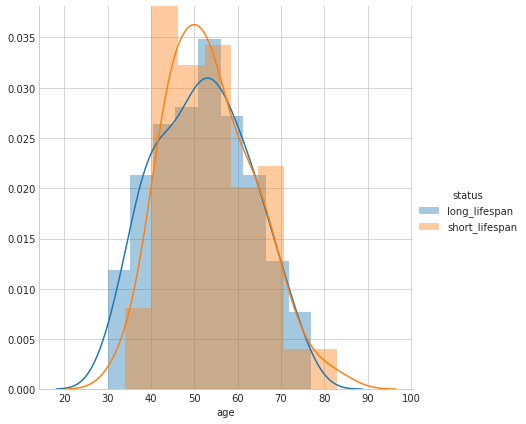

In [0]:
# age
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
sns.FacetGrid(hman,hue='status',size=6).\
map(sns.distplot,'age').add_legend()
plt.show()

* <b>Observation:</b>
     * The Histogram, PDF and CDF are overlapping each other for large portion. 
     * However from histogram , it is evident that patient with age in between 30-35 had long lifespan.
     * Patient with age in between 78-83 didn't survive long post operation. 
     * The overlap region falls in the age group of 35-78. we can't really say anything about this age group due to overlapping. 
    

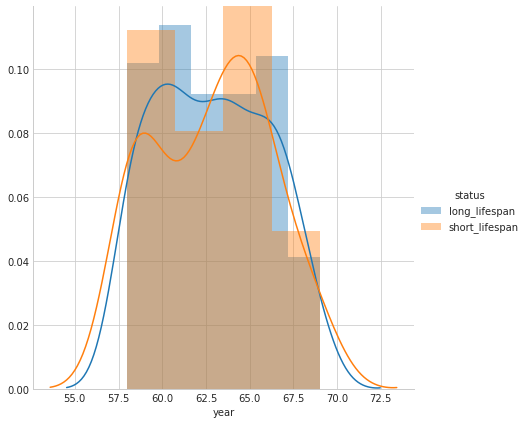

In [0]:
# year

sns.set_style('whitegrid')
sns.FacetGrid(hman,hue='status',size=6).\
map(sns.distplot,'year').add_legend()
plt.show()

* <b> Observation </b>
    * The histogram and PDF for feature 'year' shows almost full overlapping. We can't much say that except that the patients had operation in between year 60-63 and 66-67 had high chance of having long lifespan.     
    * It is unrealistic to choose threshold to classify the point for large overlapping classes.
    
    * This feature is not useful as long as classification of points is concerned.

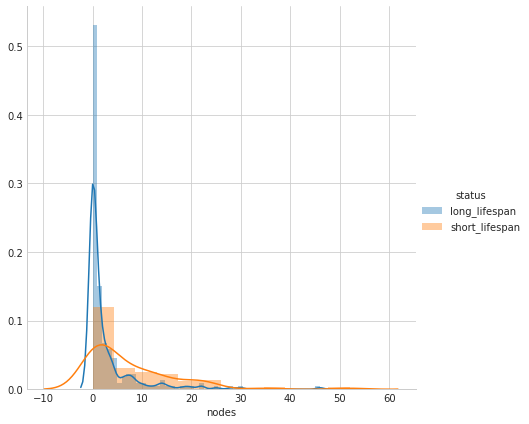

In [0]:
# year
sns.set_style('whitegrid')
sns.FacetGrid(hman,hue='status',size=6).\
map(sns.distplot,'nodes').add_legend()
plt.show()

* <b>observation </b>
    * The patients with 0-2 nodes had long_lifespan. beyond that, there is a trend of patients had short_lifespan. 
    * this plot has less overlap in comparison with Age and year 
    
    

bin_edges: [ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


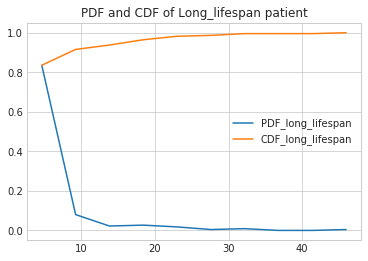

In [0]:
#pdf and cdf of patients with long_lifespan

count1,bin_edges1=np.histogram(hman_long['nodes'],bins=10,density=True)
pdf_lsp1=count1/sum(count1)
cdf_lsp1=np.cumsum(pdf_lsp1)

print("bin_edges:",bin_edges1)
plt.plot(bin_edges1[1:],pdf_lsp1)
plt.plot(bin_edges1[1:],cdf_lsp1)
plt.title("PDF and CDF of Long_lifespan patient")
plt.legend(['PDF_long_lifespan','CDF_long_lifespan'])



plt.show()

* <b> observation </b>
    * From CDF it can be said that, 85 % of patient who had long_lifespan, had nodes less than 10. 
    * The PDF trend shows the higher the number of nodes , lesser the probability of having long life span. for instance , the patent with 30 nodes has less than 1% chance of having long life span.

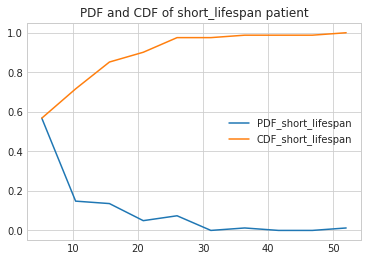

In [0]:
#pdf and cdf of patients with short_lifespan


count2,bin_edges2=np.histogram(hman_short['nodes'],bins=10,density=True)
pdf_lsp2=count2/sum(count2)
cdf_lsp2=np.cumsum(pdf_lsp2)
plt.plot(bin_edges2[1:],pdf_lsp2)
plt.plot(bin_edges2[1:],cdf_lsp2)
plt.title("PDF and CDF of short_lifespan patient")
plt.legend(['PDF_short_lifespan','CDF_short_lifespan'])
plt.show()



* <b> Observation </b>
    * CDF shows that the 75% of patients who had short_lifespan after operation, had more than 10 node. 

## mean, variance and std-dev

In [0]:
print("\n\u2022 Means")
print("-"*50)
print("Patients with longer life span:",np.mean(hman_long['nodes']))
print("Patients with short life span:",np.mean(hman_short['nodes']))
print("\n\u2022 Standard Deviations")
print("-"*50)

print("Std in Patients with longer life span:",np.std(hman_long['nodes']))
print("Std in Patients with short life span:",np.std(hman_short['nodes']))



• Means
--------------------------------------------------
Patients with longer life span: 2.7911111111111113
Patients with short life span: 7.45679012345679

• Standard Deviations
--------------------------------------------------
Std in Patients with longer life span: 5.857258449412131
Std in Patients with short life span: 9.128776076761632


## Median, percentile, Quartile, IQR, MAD

In [0]:
print("\n Feature:Nodes")
print("\n\u2022 Medians")
print("-"*50)
print("patients with long life span::",np.median(hman_long['nodes']))
print("patients with short life span:",np.median(hman_short['nodes']))

print("\n\u2022 Percentiles based on feature Nodes")
print("-"*50)
print("Patients with longer life span")
print("10th percentile:",np.percentile(hman_long['nodes'],10))
print("30th percentile:",np.percentile(hman_long['nodes'],30))
print("60th percentile:",np.percentile(hman_long['nodes'],60))
print("90th percentile:",np.percentile(hman_long['nodes'],90))
print("99th percentile:",np.percentile(hman_long['nodes'],99))

print("\n")


print("Patients with shorter life span")
print("10th percentile:",np.percentile(hman_short['nodes'],10))
print("30th percentile:",np.percentile(hman_short['nodes'],30))
print("60th percentile:",np.percentile(hman_short['nodes'],60))
print("90th percentile:",np.percentile(hman_short['nodes'],90))
print("99th percentile:",np.percentile(hman_short['nodes'],99))


print("\n\u2022 Quantiles:")
print("-"*50)
print("patients with long life span:",np.percentile(hman_long['nodes'],np.arange(0,100,25)))
print("patients with shorter life span:",np.percentile(hman_short['nodes'],np.arange(0,100,25)))


print("\n\u2022 90th percentiles:")
print("-"*50)
print("patients with long life span:",np.percentile(hman_long['nodes'],90))
print("patients with short life span:",np.percentile(hman_short['nodes'],90))


from statsmodels import robust 
print("\n\u2022 Median Absolute Deviation")
print("-"*50)
print("MAD(nodes) of patients with long life span:",robust.mad(hman_long['nodes']))
print("MAD(nodes) of patients with short life span:",robust.mad(hman_short['nodes']))



 Feature:Nodes

• Medians
--------------------------------------------------
patients with long life span:: 0.0
patients with short life span: 4.0

• Percentiles based on feature Nodes
--------------------------------------------------
Patients with longer life span
10th percentile: 0.0
30th percentile: 0.0
60th percentile: 1.0
90th percentile: 8.0
99th percentile: 27.279999999999973


Patients with shorter life span
10th percentile: 0.0
30th percentile: 1.0
60th percentile: 6.0
90th percentile: 20.0
99th percentile: 38.40000000000005

• Quantiles:
--------------------------------------------------
patients with long life span: [0. 0. 0. 3.]
patients with shorter life span: [ 0.  1.  4. 11.]

• 90th percentiles:
--------------------------------------------------
patients with long life span: 8.0
patients with short life span: 20.0

• Median Absolute Deviation
--------------------------------------------------
MAD(nodes) of patients with long life span: 0.0
MAD(nodes) of patients with 

## Box plot and Whiskers

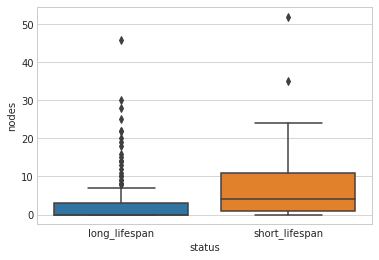

In [0]:
sns.boxplot(x='status',y='nodes',data=hman)
plt.show()

<b> Observation </b>
* For the class long_lifespan , node values of 25th percentile and 50th percentile are similar( 0). The threshold goes from 0 to approximately 7.


* As we see that short_lifespan also lies in this range , we can conclude that there is overlapping and 50% chance of error for classification.   


* The 75th percentile of long_lifespan is similar to median of short_lifespan based on feature nodes. The boxplot for class short_lifespan has threshold range of 0-25. 


* 50% of patients who had long life span, had almost 0 nodes. In case of short_lifespan, 50% of patients had at least 4 nodes.


* This overlapping of points implies that the classification only based on node numbers wouldn't be wise idea.

## Violin plots

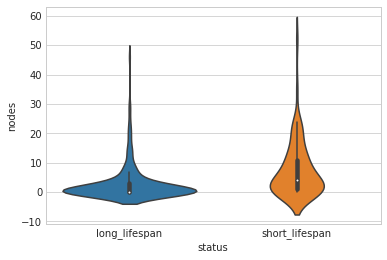

In [0]:
sns.violinplot(x='status',y='nodes',data=hman)
plt.show()

<b> Observation </b>
* Violin plot shows the PDF and boxplot for long_lifespan and short_lifespan together in single plot. 
* From the PDF part of violin plot , we can say , data points have higher density near 0 nodes for long_lifespan. and whisker lies in the range of 0 to 8. median value is at 0.
* the other part i.e short lifespan violin plot shows the density is high 4 and whisker ranges from 0 to 25. median denoted by the white dot inside the box is at 5 approximately. 

# Multivariate Probability density , contour plot

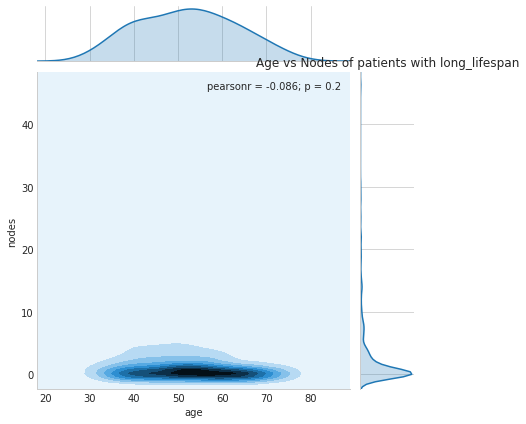

In [0]:
sns.jointplot(x='age',y='nodes',data=hman_long ,kind='kde')
plt.title('Age vs Nodes of patients with long_lifespan')
plt.show()

<b> Observation </b>
* The contour graph of age vs nodes for the patients with longer life_span shows the high density of points in age  48-60 and nodes 0-4.

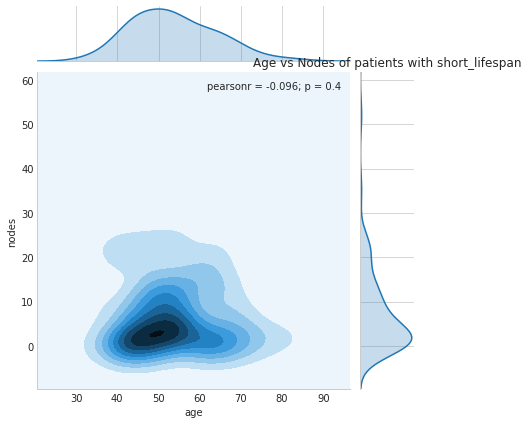

In [0]:
sns.jointplot(x='age',y='nodes',data=hman_short ,kind='kde')
plt.title('Age vs Nodes of patients with short_lifespan')
plt.show()

<b> Observation </b>
* From this contour plot of age vs nodes for the patients with shorter lifespan shows the extremely high density of points for nodes 0-5 and age range of 42-57. 

# Conclusion:
* feature nodes is much useful in classification than other two features age and year as they show larger overlapping.
* The patient who had long life span, had nodes less than 5, approximately.

*  85 % of patient who had long_lifespan, had nodes less than 10.
* 75% of patients who had short_lifespan after operation, had more than 10 node.

* By no mean, This dataset is linearly separable or we can't use simple if-else method to come up with separating condition. That implies requirement of Non-linear model.

* However, Using nodes as standalone feature for classification wouldn't be wise idea as we have seen overlapping of points in PDF and Boxplot for the feature nodes. . Although it provides better insight on data ,it would be better to arrange more feature which could be useful. 